In [1]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib.pyplot as plt
import numpy as nmp

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [2]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

In [3]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [4]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [The Shawshank Redemption...",9.235296395764857,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156152288594068,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989611837320712,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [The Godfather Part II], ...",8.98402741580915,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951099189570252,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Everything Everywhere ...",8.006164722157207,"Dan Kwan (dir.), Michelle Yeoh, Stephanie Hsu",/title/tt6710474/
246,"[\n 247.\n , [The Iron Giant], \n, [...",8.005105104891824,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.005003058756468,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Aladdin], \n, [(1992)]...",8.004982041685267,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/


In [5]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [6]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [7]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [8]:
data.head()


,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.235296395764857,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156152288594068,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989611837320712,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008
3,"[\n 4.\n , [The Godfather Part II], ...",8.98402741580915,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951099189570252,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957


In [9]:
data.crew[1]


'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

***HW2***

Задача 1. Получить список всех участников команд (убрать постфикс (dir.) у директоров). Найти количество уникальных имен.

In [10]:
participants_list = []

for participant in data.crew:
    participant = participant.replace(" (dir.)", "").split(", ")
    for i in participant:
        participants_list.append(i)
        
participants_set = set(participants_list)
print("Всего имен в списке:", len(participants_list))
print("Количество уникальных имен:", len(participants_set))

Всего имен в списке: 750
Количество уникальных имен: 527


Задача 2. Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

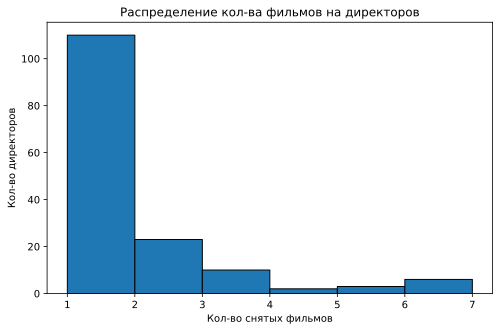

Директора, у которых больше всего фильмов в топе: , Martin Scorsese, Akira Kurosawa, Christopher Nolan, Steven Spielberg, Stanley Kubrick


In [11]:
dir_list = []
for director in data.crew:
    director = director.replace(" (dir.)", "").split(", ")
    dir_list.append(director[0])

dir_set = set(dir_list) 
data["directors"] = dir_list

vis = data["directors"].value_counts()
plt.hist(vis, edgecolor = "black", bins=6)
plt.title("Распределение кол-ва фильмов на директоров")
plt.xlabel("Кол-во снятых фильмов")
plt.ylabel("Кол-во директоров")
plt.show()


best_dirs = [i[0] for i in data["directors"].value_counts().items() if i[1] == 7]
print("Директора, у которых больше всего фильмов в топе: ",*best_dirs, sep=", ")

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

Задача 4. Построить распределение топовых фильмов по годам

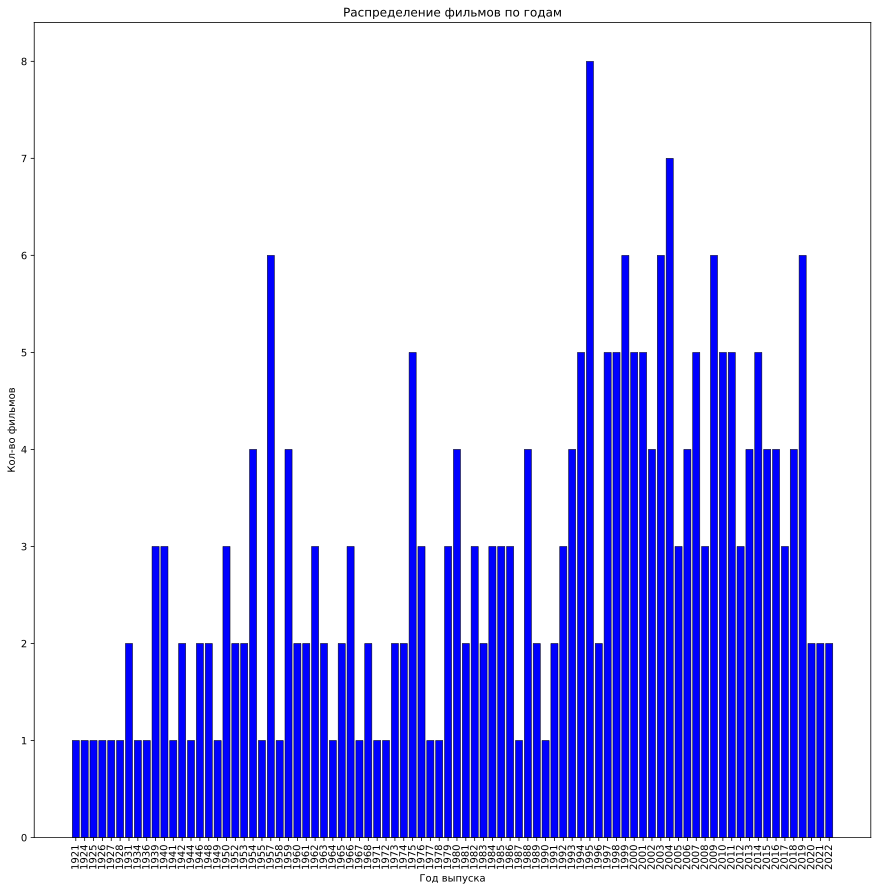

In [12]:
year = [data[0] for data in data["year"].value_counts().iteritems()]
count_year = [data[1] for data in data["year"].value_counts().iteritems()]
res = {"year":year, "count year": count_year}
f_year = pd.DataFrame(res)
f_year = f_year.sort_values(by="year", ascending=True)

fig, ax = plt.subplots()
ax.bar(f_year["year"], f_year["count year"], edgecolor = "black", linewidth = 0.5, color = "blue")
plt.title("Распределение фильмов по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Кол-во фильмов")
plt.xticks(rotation=90)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()

Задача 5. Построить распределение топовых фильмов рейтингу:

Округлить до сотых и отрисовать
Округлить до десятых и отрисовать
Округлить до целых и отрисовать

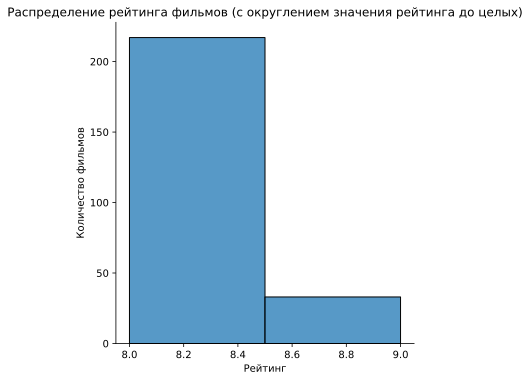

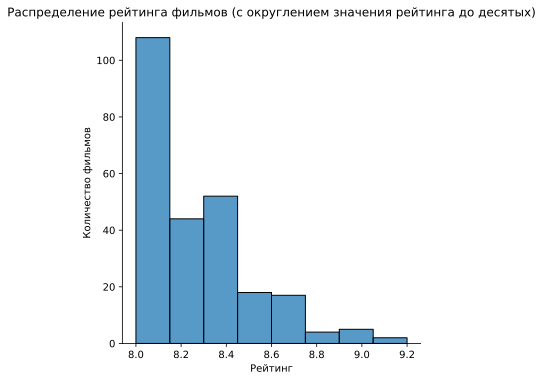

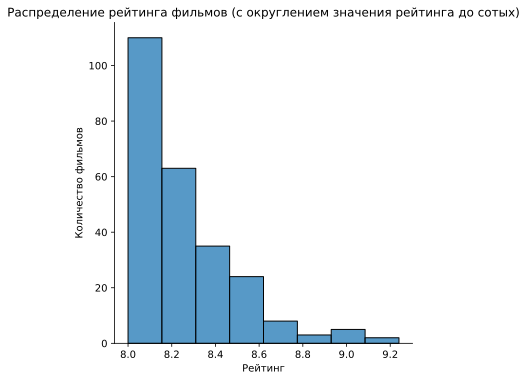

In [13]:
rating = pd.Series(data["ratings"]).to_list()
rating_string = nmp.array(rating)

vis1 = seaborn.displot(nmp.round(rating_string.astype(float), 0), bins = 2)
plt.title("Распределение рейтинга фильмов (с округлением значения рейтинга до целых)")
plt.xlabel("Рейтинг")
plt.ylabel("Количество фильмов")
plt.show()

vis2 = seaborn.displot(nmp.round(rating_string.astype(float), 1), bins = 8)
plt.title("Распределение рейтинга фильмов (с округлением значения рейтинга до десятых)")
plt.xlabel("Рейтинг")
plt.ylabel("Количество фильмов")
plt.show()

vis3 = seaborn.displot(nmp.round(rating_string.astype(float), 2), bins = 8)
plt.title("Распределение рейтинга фильмов (с округлением значения рейтинга до сотых)")
plt.xlabel("Рейтинг")
plt.ylabel("Количество фильмов")
plt.show()



Задача 6. Используйте ссылку http://www.imdb.com/ и динамически добавляя ссылку на фильм из колонки links соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.

Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with.

Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:9.2 based on 2,554,919 user ratings. Из этого текста нужно достать = 2,554,919. Подсказка: используя метод find_all с аргументом attrs в который нужно передать {'class': 'ratingColumn imdbRating'} от страници http://www.imdb.com/chart/top. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.

Задача 9. Постройте топ 10 слов, которые встречаются

в названии фильмов
в описании фильмов
в названии и в описании фильмов

Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для The Godfather ожидается получить список из Crime, Drama. (Можно увидеть эти теги по картинкой к фильму)